In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
class Points:
    def __init__(self, coordinates, label=None):
        self.x = coordinates[0]
        self.y = coordinates[1]
        self.label = label
    
    def __lt__(self, other):
        """Define la relación de orden entre dos puntos."""
        return (self.y > other.y) or (self.y == other.y and self.x < other.x)

    def __str__(self):
        return f"{self.label} ({self.x}, {self.y})"
    def __repr__(self):
        return self.__str__()

def plot_points(points):
    """Visualiza los segmentos en un gráfico."""
   # Dibujar todos los puntos
    x = [p.x for p in points]
    y = [p.y for p in points]
    plt.scatter(x, y, c='blue', label="Puntos")
    for p in points:
            plt.text(p.x, p.y, p.label, fontsize=8, ha='right', va='bottom', color='black')
        
def generate_random_points(N, low_value, high_value, integer=True): 
    """Genera N puntos aleatorios en un rango especificado."""
    coordinates = []
    for i in range(N):
        x = int(np.random.uniform(low_value, high_value)) if integer else np.random.uniform(low_value, high_value)
        y = int(np.random.uniform(low_value, high_value)) if integer else np.random.uniform(low_value, high_value)
        label = f"P{i+1}"
        p = Points((x, y), label)
        coordinates.append(p)
    return coordinates

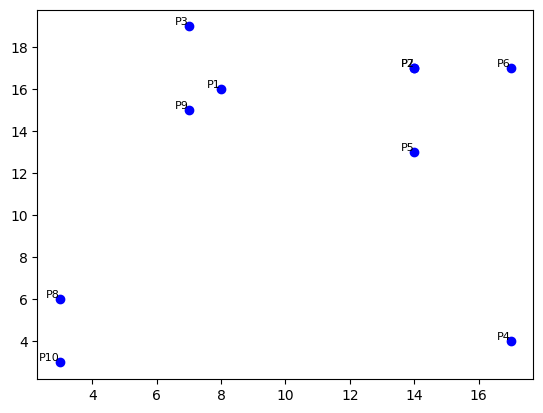

In [5]:
N = 10 
np.random.seed(27)
points = generate_random_points(N,0,20)
plot_points(points)

In [6]:

mean_x = np.mean([po.x for po in points])
mean_y = np.mean([po.y for po in points])

centroid = Points([mean_x, mean_y],label='centroid')
centroid

centroid (10.4, 12.7)

In [7]:
class Node:
    def __init__(self, punto, left=None, right=None):
        self.data = punto
        self.left = left
        self.right = right
    
    def __str__(self):
        return str(self.data)

class Arbol:
    def __init__(self, centroide):
        self.raiz = None
        self.centroide = centroide

    def dist(self, node):
        """Calcula la distancia Manhattan entre el centroide y un nodo."""
        return abs(self.centroide.x - node.data.x) + abs(self.centroide.y - node.data.y)

    def insert(self, node):
        """Inserta un nodo en el árbol binario."""
        if self.raiz is None:
            self.raiz = node
        else:
            self._insert(self.raiz, node)

    def _insert(self, actual, node):
        """Inserta el nodo en la posición correcta basado en la distancia."""
        if actual is None:
            return node

        if self.dist(node) < self.dist(actual):
            actual.left = self._insert(actual.left, node)
        else:
            actual.right = self._insert(actual.right, node)

        return actual

    def inorder(self, actual=None):
        """Recorre el árbol en orden (inorder traversal)."""
        # Si no se proporciona un nodo, empezar desde la raíz
        if actual is None:
            actual = self.raiz
            # Si el árbol está vacío, retornar lista vacía
            if actual is None:
                return []

        resultado = []
        # Recorrer subárbol izquierdo
        if actual.left is not None:
            resultado.extend(self.inorder(actual.left))
        
        # Agregar nodo actual
        resultado.append(actual.data)
        
        # Recorrer subárbol derecho
        if actual.right is not None:
            resultado.extend(self.inorder(actual.right))
        
        return resultado

    def print_tree(self, node=None, level=0):
        """Imprime el árbol de forma visual."""
        if node is None:
            node = self.raiz
            if node is None:
                return
            
        print("  " * level + str(node.data))
        if node.left:
            self.print_tree(node.left, level + 1)
        if node.right:
            self.print_tree(node.right, level + 1)

In [8]:
arbol = Arbol(centroid)

# Envuelve cada punto en un objeto Node antes de insertarlo
p1 = Node(points[0])
p2 = Node(points[1])
p3 = Node(points[2])
p4 = Node(points[3])

arbol.insert(p1)
arbol.insert(p2)
arbol.insert(p3)
arbol.insert(p4)

print(arbol.inorder())


[P1 (8, 16), P2 (14, 17), P3 (7, 19), P4 (17, 4)]


In [59]:
print(arbol.raiz)

P1 (8, 16)
